In [328]:
import numpy as np
import pandas as pd
from libsvm.svmutil import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report

#reading in SMS Spam Collection, formatting file correctly
hamOrSpamData = pd.read_csv("SMSSpamCollection", sep = "\t", 
                            header = None, names = ["label", "message"])
hamOrSpamData['label'] = hamOrSpamData['label'].map({"ham": 0, "spam" : 1})

hamOrSpamX = hamOrSpamData['message'] # features
hamOrSpamy = hamOrSpamData['label'] # 0 or 
#Split data into test/training sets: 20/80, 50/50, 80/20
X_train_split1, X_test_split1, y_train_split1, y_test_split1 = train_test_split(hamOrSpamX, 
            hamOrSpamy, test_size=0.8,stratify=hamOrSpamy)

#vectorize data
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=5000)
X_train_vec_split1 = vectorizer.fit_transform(X_train_split1)
X_test_vec_split1 = vectorizer.transform(X_test_split1)

#Format data into (index, value) pairs for LIBSVM
def libsvm_format(X):
    return [{i: v for i, v in zip(row.indices, row.data)} for row in X]

X_train_dict_split1 = libsvm_format(X_train_vec_split1)
X_test_dict_split1 = libsvm_format(X_test_vec_split1)

#training LIBSVM model
problem = svm_problem(y_train_split1.tolist(),X_train_dict_split1)
params = svm_parameter('-s 0 -t 0 -c 1')  # Linear kernel (-t 0), C=1
model = svm_train(problem, params)

#predictions
p_label, p_acc_split1, p_vals = svm_predict(y_test_split1.tolist(), X_test_dict_split1, model)

#split the training data further into training and validation subsets
X_train_sub_split1, X_val_split1, y_train_sub_split1, y_val_split1 = train_test_split(
    X_train_vec_split1, y_train_split1, test_size=0.8, stratify=y_train_split1
)

#format the subsets for LIBSVM
X_train_dict_sub_split1 = libsvm_format(X_train_sub_split1)
X_val_dict_split1 = libsvm_format(X_val_split1)

#train a new LIBSVM model on the training subset
problem_sub = svm_problem(y_train_sub_split1.tolist(), X_train_dict_sub_split1)
model_sub = svm_train(problem_sub, params)

#predict on the training and validation subsets
p_label_train, p_acc_train_split1, _ = svm_predict(
    y_train_sub_split1.tolist(), X_train_dict_sub_split1, model_sub)
p_label_val, p_acc_val_split1, _ = svm_predict(
    y_val_split1.tolist(), X_val_dict_split1, model_sub)

#print the training and validation accuracy
print(f"Training Accuracy: {p_acc_train_split1[0]}%")
print(f"Validation Accuracy: {p_acc_val_split1[0]}%")
print(f"Test Accuracy: {p_acc_split1[0]}%")

Accuracy = 97.5998% (4351/4458) (classification)
Accuracy = 99.5495% (221/222) (classification)
Accuracy = 89.3498% (797/892) (classification)
Training Accuracy: 99.54954954954955%
Validation Accuracy: 89.34977578475336%
Test Accuracy: 97.59982054733064%


In [363]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from libsvm.svmutil import *
from sklearn.metrics import classification_report
from scipy.sparse import csr_matrix

# Step 1: Load the dataset
file_path = "imdb_labelled.txt"  # Change to your dataset path
data = pd.read_csv(file_path, sep='\t', header=None, names=["sentence", "label"])

# Step 2: Preprocess the data
X = data['sentence']  # Features (sentences)
y = data['label']     # Labels (0 = negative, 1 = positive)

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features = 5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

def libsvm_format(X):
    return [{i: v for i, v in zip(row.indices, row.data)} for row in X]

X_train_dict = libsvm_format(X_train_vec)
X_test_dict = libsvm_format(X_test_vec)

# Step 4: Train the LIBSVM model
problem = svm_problem(y_train.tolist(), X_train_dict)
params = svm_parameter('-s 0 -t 0 -c 1')  # Linear kernel (-t 0), C=1
model = svm_train(problem, params)

# Step 5: Evaluate the model on the test data
p_label, p_acc, p_vals = svm_predict(y_test.tolist(), X_test_dict, model)

# Step 6: Split training data into training and validation subsets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_vec, y_train, test_size=0.8, stratify=y_train)

# Train a new model on the training subset
problem_sub = svm_problem(y_train_sub.tolist(), X_train_sub)
model_sub = svm_train(problem_sub, params)

# Evaluate on training and validation subsets
p_label_train, p_acc_train, _ = svm_predict(y_train_sub.tolist(), X_train_sub, model_sub)
p_label_val, p_acc_val, _ = svm_predict(y_val.tolist(), X_val, model_sub)

print(f"Training Accuracy: {p_acc_train[0]}%")
print(f"Validation Accuracy: {p_acc_val[0]}%")
print(f"Test Accuracy: {p_acc[0]}%")



Accuracy = 66.778% (400/599) (classification)
Accuracy = 100% (29/29) (classification)
Accuracy = 50.8333% (61/120) (classification)
Training Accuracy: 100.0%
Validation Accuracy: 50.83333333333333%
Test Accuracy: 66.7779632721202%


In [361]:
"""
USE ONLY FOR CLEAN GITHUB LINK AFTERWARDS
"""
import pandas as pd
from libsvm.svmutil import svm_problem, svm_parameter, svm_train, svm_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load the SMS Spam Collection dataset
data = pd.read_csv("SMSSpamCollection", sep="\t", header=None, names=["label", "message"])
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Step 2: Split the data into train and test sets
X = data['message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Step 3: Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Format data for LIBSVM
X_train_dict = X_train_vec.toarray().tolist()
X_test_dict = X_test_vec.toarray().tolist()

# Step 5: Perform a split of the training data into train and validation subsets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_vec, y_train, test_size=0.2, stratify=y_train)
X_train_sub_dict = X_train_sub.toarray().tolist()
X_val_dict = X_val.toarray().tolist()

# Step 6: Train and evaluate SVM models
# Define SVM parameters
params_linear = svm_parameter('-s 0 -t 0 -c 1')  # Linear kernel

# Train on training subset
problem_sub = svm_problem(y_train_sub.tolist(), X_train_sub_dict)
model_linear = svm_train(problem_sub, params_linear)

# Evaluate on training subset
_, p_acc_train_linear, _ = svm_predict(y_train_sub.tolist(), X_train_sub_dict, model_linear)

# Evaluate on validation subset
_, p_acc_val_linear, _ = svm_predict(y_val.tolist(), X_val_dict, model_linear)

# Train final models on full training set
problem_full = svm_problem(y_train.tolist(), X_train_dict)
model_linear_full = svm_train(problem_full, params_linear)

# Evaluate on test set
p_label_test_linear, p_acc_test_linear, _ = svm_predict(y_test.tolist(), X_test_dict, model_linear_full)

# Print results
print("Linear Kernel:")
print(f"Linear Training Accuracy: {p_acc_train_linear[0]}%")
print(f"Linear Validation Accuracy: {p_acc_val_linear[0]}%")
print(f"Linear Test Accuracy: {p_acc_test_linear[0]}%")


Accuracy = 99.5512% (3549/3565) (classification)
Accuracy = 97.7578% (872/892) (classification)
Accuracy = 98.296% (1096/1115) (classification)
Linear Kernel:
Linear Training Accuracy: 99.55119214586256%
Linear Validation Accuracy: 97.75784753363229%
Linear Test Accuracy: 98.29596412556054%


In [322]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from libsvm.svmutil import svm_problem, svm_parameter, svm_train, svm_predict

# Step 1: Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Create two groups of two categories
# Group 1: Setosa (0) and Versicolor (1) => Label as 0
# Group 2: Virginica (2) => Label as 1
y = np.where(y < 2, 0, 1)

# Step 3: Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.8, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.8, stratify=y_train_full)  # 0.25 x 0.8 = 0.2

# Step 4: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 5: Convert the data into a dictionary format for LIBSVM
# LIBSVM expects data as (index, value) pairs
def libsvm_format(X):
    return [{i: v for i, v in enumerate(row)} for row in X]

X_train_dict = libsvm_format(X_train)
X_val_dict = libsvm_format(X_val)
X_test_dict = libsvm_format(X_test)

# Step 6: Train the LIBSVM model
problem = svm_problem(y_train.tolist(), X_train_dict)
params = svm_parameter('-s 0 -t 0 -c 1')  # Linear kernel (-t 0), C=1
model = svm_train(problem, params)

# Step 7: Evaluate on training, validation, and test sets
# Training accuracy
p_label_train, p_acc_train, _ = svm_predict(y_train.tolist(), X_train_dict, model)

# Validation accuracy
p_label_val, p_acc_val, _ = svm_predict(y_val.tolist(), X_val_dict, model)

# Test accuracy
p_label_test, p_acc_test, _ = svm_predict(y_test.tolist(), X_test_dict, model)

# Step 8: Print accuracies and classification report
print(f"Training Accuracy: {p_acc_train[0]}%")
print(f"Validation Accuracy: {p_acc_val[0]}%")
print(f"Test Accuracy: {p_acc_test[0]}%")


Accuracy = 100% (6/6) (classification)
Accuracy = 83.3333% (20/24) (classification)
Accuracy = 84.1667% (101/120) (classification)
Training Accuracy: 100.0%
Validation Accuracy: 83.33333333333334%
Test Accuracy: 84.16666666666667%


In [342]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the SMS Spam Collection dataset
ham_or_spam_data = pd.read_csv("SMSSpamCollection", sep="\t", header=None, names=["label", "message"])

# Step 2: Preprocess the data
# Convert labels to binary (ham = 0, spam = 1)
ham_or_spam_data['label'] = ham_or_spam_data['label'].map({'ham': 0, 'spam': 1})

# Step 3: Split the data into features and labels
X = ham_or_spam_data['message']  # Features
y = ham_or_spam_data['label']    # Labels

# Step 4: Split data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.8, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.8, stratify=y_train_full)

# Step 5: Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)  # Number of trees
#hyperparameters = n_estimators, max_depth, min_samples_leaf, min_samples, split
rf_model.fit(X_train_vec, y_train)

# Step 7: Evaluate the model on the training, validation, and test sets
train_accuracy = rf_model.score(X_train_vec, y_train) * 100
val_accuracy = rf_model.score(X_val_vec, y_val) * 100
test_accuracy = rf_model.score(X_test_vec, y_test) * 100

# Step 8: Make predictions and generate a classification report
predictions = rf_model.predict(X_test_vec)
print("Training Accuracy: {:.2f}%".format(train_accuracy))
print("Validation Accuracy: {:.2f}%".format(val_accuracy))
print("Test Accuracy: {:.2f}%".format(test_accuracy))
#print("\nClassification Report:\n", classification_report(y_test, predictions))


Training Accuracy: 100.00%
Validation Accuracy: 90.25%
Test Accuracy: 90.40%


In [165]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the sentiment dataset
# Assuming the sentiment dataset is in the same format as "sentiment labelled sentences"
data = pd.read_csv("imdb_labelled.txt", sep='\t', header=None, names=["sentence", "label"])

# Step 2: Preprocess the data
X = data['sentence']  # Features (text sentences)
y = data['label']     # Labels (0 = negative, 1 = positive)

# Step 3: Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.8, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.8, stratify=y_train_full)

# Step 4: Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, min_samples_split=4,
                             max_features='log2', bootstrap=True,
                             criterion = 'entropy')
clf.fit(X_train_vec, y_train)

# Step 6: Evaluate the model
# Training Accuracy
train_acc = clf.score(X_train_vec, y_train) * 100
print(f"Training Accuracy: {train_acc:.2f}%")

# Validation Accuracy
val_acc = clf.score(X_val_vec, y_val) * 100
print(f"Validation Accuracy: {val_acc:.2f}%")

# Test Accuracy
test_acc = clf.score(X_test_vec, y_test) * 100
print(f"Test Accuracy: {test_acc:.2f}%")




Training Accuracy: 100.00%
Validation Accuracy: 53.33%
Test Accuracy: 55.76%


In [207]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split into two groups of two categories
# Group 1: Setosa (0) and Versicolor (1) => Label as 0
# Group 2: Virginica (2) => Label as 1
y = np.where(y < 2, 0, 1)

# Step 3: Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.8, stratify=y_train)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 5: Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,    # No maximum depth
    min_samples_split=2,  # Minimum samples to split an internal node
    min_samples_leaf=1   # Minimum samples in a leaf node
)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
# Training accuracy
train_predictions = rf_model.predict(X_train)
train_report = classification_report(y_train, train_predictions, output_dict=True)
training_accuracy = train_report['accuracy'] * 100

# Validation accuracy
val_predictions = rf_model.predict(X_val)
val_report = classification_report(y_val, val_predictions, output_dict=True)
validation_accuracy = val_report['accuracy'] * 100

# Test accuracy
test_predictions = rf_model.predict(X_test)
test_report = classification_report(y_test, test_predictions, output_dict=True)
test_accuracy = test_report['accuracy'] * 100

# Step 7: Print the results
print("Training Accuracy: {:.2f}%".format(training_accuracy))
print("Validation Accuracy: {:.2f}%".format(validation_accuracy))
print("Test Accuracy: {:.2f}%".format(test_accuracy))

#print("\nClassification Report (Test Data):\n", classification_report(y_test, test_predictions))


Training Accuracy: 100.00%
Validation Accuracy: 100.00%
Test Accuracy: 95.00%


In [371]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load the Ham or Spam dataset
ham_or_spam_data = pd.read_csv("SMSSpamCollection", sep="\t", header=None, names=["label", "message"])
ham_or_spam_data['label'] = ham_or_spam_data['label'].map({'ham': 0, 'spam': 1})

# Step 2: Split the data into features and labels
X = ham_or_spam_data['message']
y = ham_or_spam_data['label']

# Step 3: Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.8, stratify=y_train)

# Step 4: Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Standardize the data (optional, for consistency with numeric datasets)
scaler = StandardScaler(with_mean=False)
X_train_vec = scaler.fit_transform(X_train_vec)
X_val_vec = scaler.transform(X_val_vec)
X_test_vec = scaler.transform(X_test_vec)

# Step 6: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_vec, y_train)

# Step 7: Make predictions and evaluate the model
# Training accuracy
train_acc = log_reg.score(X_train_vec, y_train) * 100

# Validation accuracy
val_acc = log_reg.score(X_val_vec, y_val) * 100

# Test accuracy and classification report
y_test_pred = log_reg.predict(X_test_vec)
test_acc = log_reg.score(X_test_vec, y_test) * 100

# Step 8: Display results
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Validation Accuracy: {val_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 100.00%
Validation Accuracy: 92.71%
Test Accuracy: 92.17%

Classification Report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3860
           1       0.99      0.42      0.59       598

    accuracy                           0.92      4458
   macro avg       0.95      0.71      0.77      4458
weighted avg       0.93      0.92      0.91      4458



In [372]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load the IMDb dataset
file_path = "imdb_labelled.txt"
data = pd.read_csv(file_path, sep='\t', header=None, names=['review', 'label'])

# Step 2: Split data into features and labels
X = data['review']
y = data['label']

# Step 3: Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.8, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.8, stratify=y_temp)

# Step 4: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train a logistic regression model
logistic_model = LogisticRegression(
    penalty='l2',          # Use L2 regularization (default)
    C=10,                 # Regularization strength
    solver='lbfgs',        # Solver for optimization
    max_iter=500,          # Maximum number of iterations
    class_weight='balanced'  # Handle imbalanced data
)

logistic_model.fit(X_train_vec, y_train)

# Step 6: Evaluate the model on training, validation, and test sets
train_predictions = logistic_model.predict(X_train_vec)
val_predictions = logistic_model.predict(X_val_vec)
test_predictions = logistic_model.predict(X_test_vec)

train_accuracy = logistic_model.score(X_train_vec, y_train)
val_accuracy = logistic_model.score(X_val_vec, y_val)
test_accuracy = logistic_model.score(X_test_vec, y_test)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Step 7: Display classification report for test set
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, test_predictions))


Training Accuracy: 90.60%
Validation Accuracy: 64.71%
Test Accuracy: 62.50%

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       232
           1       0.65      0.59      0.62       248

    accuracy                           0.62       480
   macro avg       0.63      0.63      0.62       480
weighted avg       0.63      0.62      0.62       480



In [373]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Create two groups of two categories
# Group 1: Setosa (0) and Versicolor (1) => Label as 0
# Group 2: Virginica (2) => Label as 1
y = np.where(y < 2, 0, 1)

# Step 3: Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.8, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.8, stratify=y_train_full)  # 20% of training data for validation

# Step 4: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 5: Train the Logistic Regression model
model = LogisticRegression(C=1.0, max_iter=500, class_weight=None)  # Default hyperparameters
model.fit(X_train, y_train)

# Step 6: Make predictions
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Step 7: Evaluate the model
train_accuracy = model.score(X_train, y_train)
val_accuracy = model.score(X_val, y_val)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy * 100,"%")
print("Validation Accuracy:", val_accuracy * 100,"%")
print("Test Accuracy:", test_accuracy * 100,"%")

#print("\nClassification Report (Test Set):\n", classification_report(y_test, test_preds))


Training Accuracy: 100.0 %
Validation Accuracy: 70.83333333333334 %
Test Accuracy: 78.33333333333333 %


Accuracy = 86.6368% (966/1115) (classification)
Accuracy = 86.6368% (966/1115) (classification)
Accuracy = 86.9058% (969/1115) (classification)
Accuracy = 86.6368% (966/1115) (classification)
Accuracy = 86.6368% (966/1115) (classification)
Accuracy = 96.9507% (1081/1115) (classification)
Accuracy = 98.6547% (1100/1115) (classification)
Accuracy = 91.3004% (1018/1115) (classification)
Accuracy = 97.13% (1083/1115) (classification)
Accuracy = 99.1031% (1105/1115) (classification)
Accuracy = 98.8341% (1102/1115) (classification)
Accuracy = 91.5695% (1021/1115) (classification)
Accuracy = 99.1031% (1105/1115) (classification)
Accuracy = 99.0135% (1104/1115) (classification)
Accuracy = 98.8341% (1102/1115) (classification)
Accuracy = 91.5695% (1021/1115) (classification)


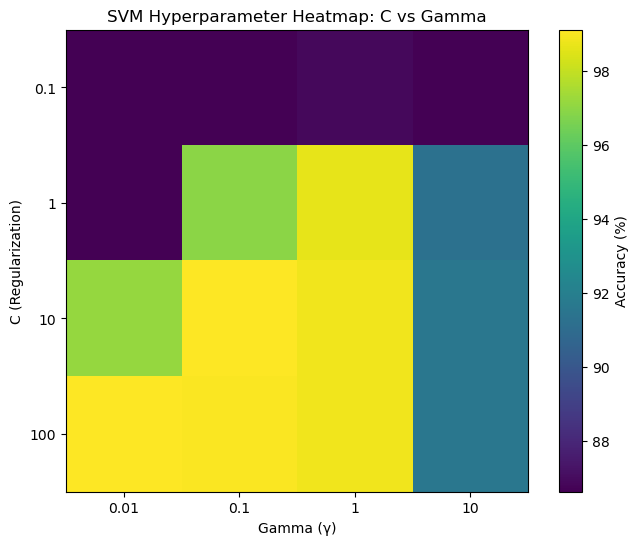

In [375]:
import numpy as np
import matplotlib.pyplot as plt
from libsvm.svmutil import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load and preprocess the data
hamOrSpamData = pd.read_csv("SMSSpamCollection", sep="\t", 
                            header=None, names=["label", "message"])
hamOrSpamData['label'] = hamOrSpamData['label'].map({"ham": 0, "spam": 1})
hamOrSpamX = hamOrSpamData['message']  # Features
hamOrSpamy = hamOrSpamData['label']    # Labels

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(hamOrSpamX, hamOrSpamy, 
                                                    test_size=0.2, stratify=hamOrSpamy)

# Vectorize the data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Format data for LIBSVM
def libsvm_format(X):
    return [{i: v for i, v in zip(row.indices, row.data)} for row in X]

X_train_dict = libsvm_format(X_train_vec)
X_test_dict = libsvm_format(X_test_vec)

# Heatmap grid search for hyperparameters C and gamma
C_values = [0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 10]
accuracy_matrix = np.zeros((len(C_values), len(gamma_values)))

# Train and evaluate models for each combination of C and gamma
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        params = svm_parameter(f'-s 0 -t 2 -c {C} -g {gamma}')  # RBF Kernel
        problem = svm_problem(y_train.tolist(), X_train_dict)
        model = svm_train(problem, params)
        
        # Predict on the test set
        _, p_acc, _ = svm_predict(y_test.tolist(), X_test_dict, model)
        accuracy_matrix[i, j] = p_acc[0]  # Store the test accuracy

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(accuracy_matrix, interpolation='nearest', cmap='viridis')
plt.colorbar(label='Accuracy (%)')
plt.xticks(range(len(gamma_values)), gamma_values)
plt.yticks(range(len(C_values)), C_values)
plt.xlabel('Gamma (γ)')
plt.ylabel('C (Regularization)')
plt.title('SVM Hyperparameter Heatmap: C vs Gamma')
plt.show()


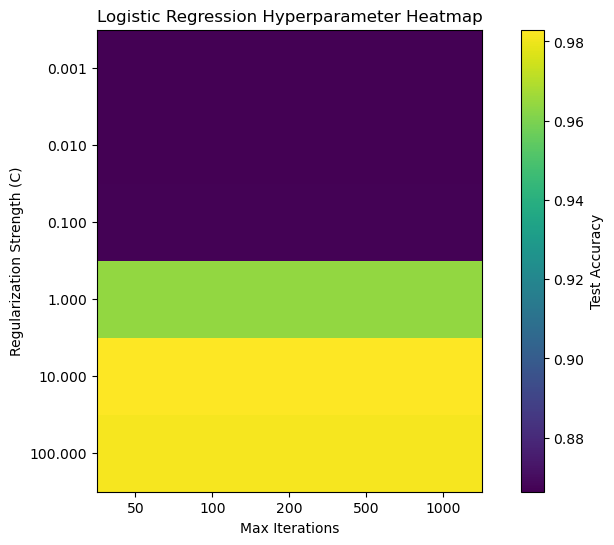

In [379]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Load the Ham vs Spam dataset
hamOrSpamData = pd.read_csv("SMSSpamCollection", sep="\t", 
                            header=None, names=["label", "message"])
hamOrSpamData['label'] = hamOrSpamData['label'].map({"ham": 0, "spam": 1})
X = hamOrSpamData['message']  # Features
y = hamOrSpamData['label']    # Labels

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter ranges
C_values = np.logspace(-3, 2, 6)  # Regularization strength (from 0.001 to 100)
max_iter_values = [50, 100, 200, 500, 1000]  # Maximum iterations

# Create a matrix to store test accuracies
heatmap_data = np.zeros((len(C_values), len(max_iter_values)))

# Train Logistic Regression models with different hyperparameters
for i, C in enumerate(C_values):
    for j, max_iter in enumerate(max_iter_values):
        model = LogisticRegression(C=C, max_iter=max_iter, solver='lbfgs', random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        heatmap_data[i, j] = accuracy_score(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, interpolation='nearest', cmap='viridis')
plt.colorbar(label='Test Accuracy')
plt.xticks(ticks=np.arange(len(max_iter_values)), labels=max_iter_values)
plt.yticks(ticks=np.arange(len(C_values)), labels=[f'{C:.3f}' for C in C_values])
plt.xlabel('Max Iterations')
plt.ylabel('Regularization Strength (C)')
plt.title('Logistic Regression Hyperparameter Heatmap')
plt.show()
